In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp,ttest_ind
import scipy.stats as stats
from scipy.stats import chi2_contingency
from itertools import combinations
import scipy.stats
import seaborn as sns

In [42]:
url = "https://drive.google.com/file/d/1_sQ8HSqkHA4N1TVonTW2Qg7hCRfemP7J/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
interact = pd.read_csv(path)

In [43]:
url = "https://drive.google.com/file/d/1MlvBh7ly9Kcv8oHQi8Pthc3EPZXRwV89/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
help = pd.read_csv(path)

In [44]:
url = "https://drive.google.com/file/d/1q_sC-WAEt_jYgMRd7hwRnIVg5o2P9A7e/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
learn = pd.read_csv(path)

In [45]:
url = "https://drive.google.com/file/d/1dzLXX0CG12XR47Fmuey_lAKFp7eznCm4/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
connect = pd.read_csv(path)

In [46]:
url = "https://drive.google.com/file/d/1Fzr5IrU0xkfmE01bLkPHS5ZKO_XDGDEW/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
services = pd.read_csv(path)

In [48]:
#To see everything in the df
# Set the max_colwidth option to None
pd.set_option('display.max_colwidth', None)

In [49]:
connect.head()

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,74,a,FIND,502,True,Homepage Version 2 - Connect • http://www.lib.montana.edu/index2.php
1,66,input,s.q,357,True,"created 5-29-2013 • 20 days 7 hours 34 mins • 2742 visits, 1587 clicks"
2,72,a,lib.montana.edu/find/,171,True,NaN
3,133,area,Montana State University Libraries - Home,83,False,NaN
4,103,a,Hours,74,True,NaN


interact (version A): 42 clicks, 10241 visits

help (version B): 53 clicks, 2689 visits

learn (version C): 21 clicks, 2726 visits

connect (version D): 38 clicks, 3142 visits

services (version E): 45 clicks, 2019 visits
       
       
alpha = 0.1,



Null Hypothesis: The 5 versions of the button are equally likely to receive clicks, and the observed differences are due to chance.

Alternative Hypothesis: The observed differences are not due to chance: there is at least one version that got so many more/much less clicks than the others that this can hardly be explained just by chance (i.e. they have a better/worse CTR, a better/worse performance).

calculate the ctr

In [51]:
# Create a dictionary with the data
data = {
    'Version': ['Interact', 'Help', 'Learn', 'Connect', 'Services'],
    'Click': [42, 38, 21, 53, 45],
    'Visit': [10283, 3180, 2747, 2742, 2064]
}

In [52]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [53]:
# Calculate CTR for each action
ctr = (df['Click'] / df['Visit']) * 100
ctr

0    0.408441
1    1.194969
2    0.764470
3    1.932896
4    2.180233
dtype: float64

calculate the chi square

In [12]:
alpha = 0.1

In [54]:
# Calculate 'No Click' for each action
df['No Click'] = df['Visit'] - df['Click']

In [14]:
# Display the DataFrame with 'No Click' column
print(df[['Version', 'No Click']])

    Version  No Click
0  Interact     10241
1      Help      3142
2     Learn      2726
3   Connect      2689
4  Services      2019


In [15]:
# Assuming you have 'Click' and 'No Click' counts for each version
click_counts = [42, 53, 21, 38, 45]
no_click_counts = [10283 - 42, 2742 - 53, 2747 - 21, 3180 - 38, 2064 - 45]

In [16]:
# Create a contingency table
contingency_table = df[['Click', 'No Click']].values


In [17]:
# Perform chi-square test
chi2_stat, p_val, dof, expected = scipy.stats.chi2_contingency(contingency_table)

alpha = 0.1

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

if p_val <= alpha:
    print("Reject null hypothesis: The versions do not receive the same click.")
else:
    print("Fail to reject null hypothesis: The versions receive the same click.")

Chi-square statistic: 96.7432353798328
P-value: 4.852334301093838e-20
Degrees of freedom: 4
Expected frequencies: [[   97.3694804  10185.6305196 ]
 [   30.11134374  3149.88865626]
 [   26.01127712  2720.98872288]
 [   25.96393224  2716.03606776]
 [   19.5439665   2044.4560335 ]]
Reject null hypothesis: The versions do not receive the same click.


In [ ]:
#OR

In [18]:
alpha = 0.1

In [19]:
# Create a DataFrame with the provided data
data = {
    'Version': ['A', 'B', 'C', 'D', 'E'],
    'Clicks': [42, 10241, 1652, 1587, 1348],
    'No-Clicks': [6569, 1463, 1095, 1155, 716]
}
df = pd.DataFrame(data)

In [20]:
# Create a contingency table
contingency_table = df[['Clicks', 'No-Clicks']].values

In [21]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.1

print(f'Chi-Square Value: {chi2}')
print(f'p-value: {p}')

if p < alpha:
    print("Reject the null hypothesis: There is a difference in CTR for the different versions.")
else:
    print("Fail to reject the null hypothesis: All versions have the same CTR.")

Chi-Square Value: 13116.389116520515
p-value: 0.0
Reject the null hypothesis: There is a difference in CTR for the different versions.


In [ ]:
#OR

In [22]:
observed = df[['Clicks', 'No-Clicks']].values.T #extracts numbers into a numpy array (matrix) and takes the transpose of it

chi2_stat, p, dgf, expected_frequencies = chi2_contingency(observed)

print(f"Chi-Squared Value = {chi2_stat}")
print(f"P-Value = {p}")
print(f"Degrees of Freedom = {dgf}")

Chi-Squared Value = 13116.389116520513
P-Value = 0.0
Degrees of Freedom = 4


In [23]:
#calculate the test result
chisq_2, pvalue_2, df_2 , expected_2 = chi2_contingency(observed)

In [24]:
chisq_2

13116.389116520513

In [25]:
pvalue_2,

(0.0,)

In [26]:
#interprete the result
if pvalue_2 < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


perform a post-hoc test using Bonferroni Adjustment to decide the winner

In brief:

Post hoc tests, also known as post hoc comparisons or pairwise comparisons, are statistical procedures used in conjunction with a Chi-Squared test to determine specific differences between groups or conditions after obtaining significant results from the Chi-Squared test. Once the Chi-Squared test reveals a significant difference among the variables being examined, post hoc tests are employed to identify which specific groups or categories are significantly different from each other.

In [67]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Given data
data = {
    'Version': ['A', 'B', 'C', 'D', 'E'],
    'Clicks': [42, 10241, 1652, 1587, 1348],
    'No-Clicks': [6569, 1463, 1095, 1155, 716]
}
df = pd.DataFrame(data)

# Calculate click-through rate (CTR) for each version
df['CTR'] = df['Clicks'] / (df['Clicks'] + df['No-Clicks'])

# Total number of versions
num_versions = len(df)

# Desired alpha level
alpha = 0.1

# Bonferroni-adjusted significance level
adjusted_alpha = alpha / num_versions

# Perform hypothesis tests for each version
for i, row in df.iterrows():
    clicks = row['Clicks']
    total = clicks + row['No-Clicks']
    p_value = proportions_ztest(count=clicks, nobs=total, value=1/num_versions)[1]

    print(f"Version {row['Version']}: p-value = {p_value}")

    if p_value < adjusted_alpha:
        print("Reject the null hypothesis - the version performs differently.")
    else:
        print("Fail to reject the null hypothesis - no significant difference.")

    print("\n---\n")


Version A: p-value = 0.0
Reject the null hypothesis - the version performs differently.

---

Version B: p-value = 0.0
Reject the null hypothesis - the version performs differently.

---

Version C: p-value = 0.0
Reject the null hypothesis - the version performs differently.

---

Version D: p-value = 0.0
Reject the null hypothesis - the version performs differently.

---

Version E: p-value = 0.0
Reject the null hypothesis - the version performs differently.

---



It looks like all versions have p-values less than the Bonferroni-adjusted significance level (0.02), so I would reject the null hypothesis for each version. This suggests that each version performs differently from the others.

In [55]:
# Calculate CTR for each action
ctr = (df['Click'] / df['Visit']) * 100
ctr

0    0.408441
1    1.194969
2    0.764470
3    1.932896
4    2.180233
dtype: float64

But Checking the CTR, Service version performs the best.

In [63]:
data = {'Version': ['Interact', 'Help', 'Learn', 'Connect', 'Services'],
        'CTR': [0.408441, 1.194969, 0.764470, 1.932896, 2.180233]}

df = pd.DataFrame(data)
df.set_index('Version', inplace=True)

print(df)

               CTR
Version           
Interact  0.408441
Help      1.194969
Learn     0.764470
Connect   1.932896
Services  2.180233


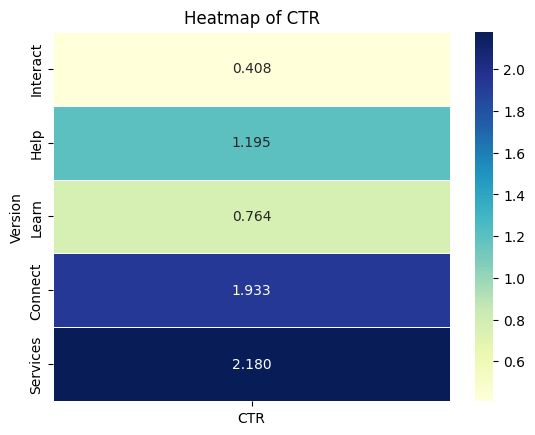

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Version' as the index
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
plt.title('Heatmap of CTR')
plt.show()